<a href="https://colab.research.google.com/github/viniciusdjo/lia1_2025_2/blob/main/Aula%2008%20-%20Modelo%20para%20Identificar%20Cats%20or%20Dogs/Construindo_um_modelo_com_TensorFlow_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

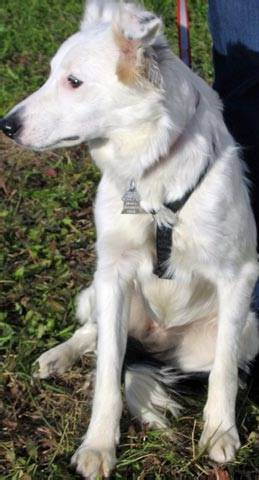

In [9]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/dataset_treino/dataset_treino/dogs/dog.108.jpg')


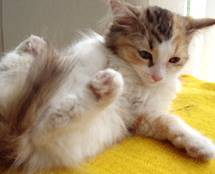

In [10]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/drive/MyDrive/dataset_treino/dataset_treino/cats/cat.105.jpg')

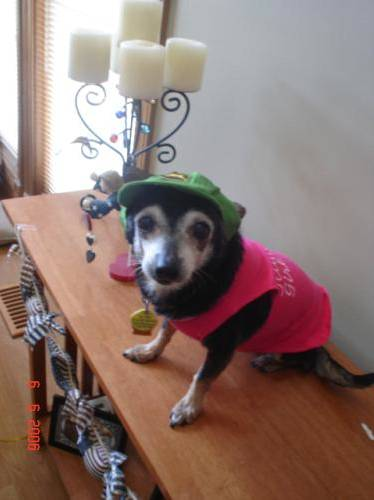

In [11]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/dataset_teste/dataset_teste/105.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [12]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [13]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [14]:
# 64 features; formato 3x3; Imagens 256x256; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [16]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_treino',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 802 images belonging to 1 classes.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

**Treinamento do Modelo**

In [18]:
# Executando o treinamento
classifier.fit(
    training_set,
    steps_per_epoch=625,
    callbacks=[early_stopping],  # Ajustado com base no número total de imagens e batch size
    epochs=25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 138ms/step - accuracy: 0.9389 - loss: 0.0592
Epoch 2/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 1.0000 - loss: 0.0000e

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Previsão: Gato.
Acurácia: 100.0 %.


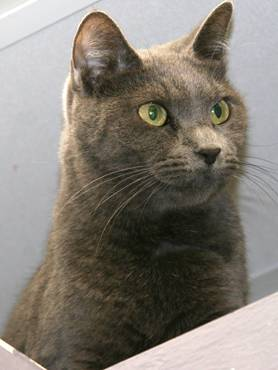

In [21]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/dataset_teste/dataset_teste/11.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/dataset_teste/dataset_teste/11.jpg')


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

Fim! 🔥